# Régression Polynomiale

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [3]:
df = pd.read_csv("./Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x_poly = np.array(df["Level"]).reshape(len(df["Level"]), 1)
y_poly = np.array(df["Salary"]).reshape(len(df["Salary"]), 1)
print(x_poly.shape, y_poly.shape)

(10, 1) (10, 1)


In [5]:
X_poly = np.hstack((x_poly, np.ones(x_poly.shape)))
X_poly = np.hstack((x_poly**2, X_poly))
X_poly = np.hstack((x_poly**3, X_poly))
X_poly = np.hstack((x_poly**4, X_poly))
X_poly.shape

(10, 5)

In [6]:
theta_poly = np.random.randn(5, 1)
theta_poly

array([[-0.33743635],
       [-0.64416962],
       [-0.02085737],
       [-0.12590215],
       [ 0.00457094]])

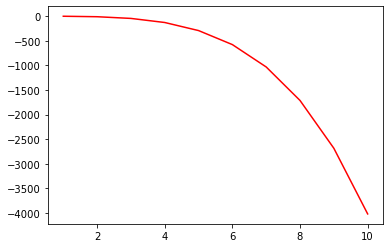

In [7]:
plt.plot(x_poly, model(X_poly, theta_poly), c='red')

In [8]:
cost_function(X_poly, y_poly, theta_poly)

72079481793.36142

In [9]:
theta_final_poly, cost_history_poly = gradient_descent(X_poly, y_poly, theta_poly, 0.000000001, 200)
theta_final_poly

array([[ 8.71594519e+01],
       [ 8.64504911e+00],
       [ 1.00019754e+00],
       [-5.31041215e-03],
       [ 2.14955778e-02]])

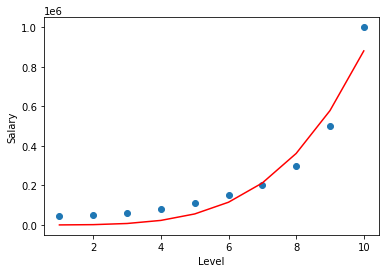

In [10]:
pred_poly = model(X_poly, theta_final_poly)
plt.scatter(x_poly, y_poly)
plt.plot(x_poly, pred_poly, c="red")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

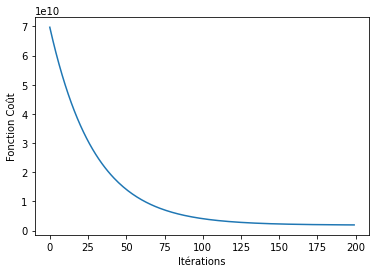

In [11]:
# Fonction coût 
plt.plot(range(len(cost_history_poly)), cost_history_poly)
plt.xlabel('Itérations')
plt.ylabel('Fonction Coût')
plt.show()

In [12]:
coef_determination(y_poly, pred_poly)

0.9516756660252075

## Avec Sklearn

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [14]:
#df = pd.read_csv("./Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [15]:
x_lvl = df.iloc[:,1:2].values
y_lvl = df.iloc[:,2].values

In [16]:
model_lvl = linear_model.LinearRegression()
model_lvl.fit(x_lvl, y_lvl)
model_lvl.coef_

array([80878.78787879])

In [17]:
y_lvl_pred = model_lvl.predict(x_lvl)

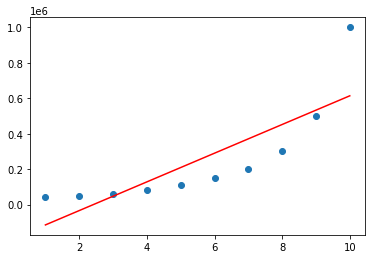

In [18]:
plt.scatter(x_lvl, y_lvl)
plt.plot(x_lvl, y_lvl_pred, color="red")
plt.show()

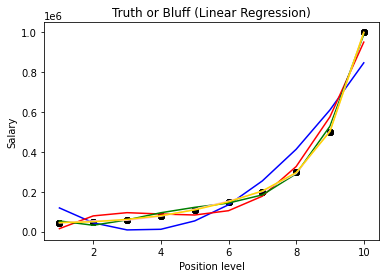

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Visualizing the Polymonial Regression results
def viz_polymonial(color):
    plt.scatter(x_lvl, y_lvl, color='black')
    plt.plot(x_lvl, pol_reg.predict(poly_reg.fit_transform(x_lvl)), color=color)
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    return

colors = ['blue', 'red', 'green', 'pink', 'gold']

for i, color in enumerate(colors, 2):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(x_lvl)
    pol_reg = linear_model.LinearRegression()
    pol_reg.fit(X_poly, y_lvl)
    viz_polymonial(color)

In [25]:
pol_reg.score(X_poly, y_lvl)

0.9999494749253776

In [32]:
mean_squared_error(y_lvl, y_lvl_pred)

26695878787.878784